In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("mnist_train.csv", header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(60000, 785)

In [4]:
# Column 0 is the target labels (digits)
y = df.iloc[:, 0]   # Extract the first column (labels) as target values

# Columns 1 to the end are the features (784 pixels for each image)
X = df.iloc[:, 1:]  # Extract the remaining columns as input features (pixels)

# Check the shape of X and y
print("Shape of X:", X.shape)  # Should be (60000, 784) -> 60k images, each with 784 pixels
print("Shape of y:", y.shape)  # Should be (60000,) -> 60k corresponding labels
print("First few labels:", y.head())  # Display the first few labels to verify

Shape of X: (60000, 784)
Shape of y: (60000,)
First few labels: 0    5
1    0
2    4
3    1
4    9
Name: 0, dtype: int64


In [5]:
# Rename the columns of the DataFrame for clarity
# First column will be "target" (the digit label)
# Remaining columns will be named "pixel_0", "pixel_1", ..., "pixel_783"
df.columns = ["target"] + [f"pixel_{i}" for i in range(df.shape[1] - 1)]

# Display the first few rows of the DataFrame with new column names
df.head()

,target,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#convert some columns into category datatype
cols=["target"]
df[cols]=df[cols].astype('category')
pd.DataFrame(df.dtypes).T

,target,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,category,int64,int64,int64,int64,int64,int64,int64,int64,int64,...,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64


In [7]:
# Filter to show only columns that contain at least one NaN
null_counts = df.isnull().sum()
null_counts_with_values = null_counts[null_counts > 0]

# Print only columns with missing values
print(null_counts_with_values)

Series([], dtype: int64)


It means that all columns have no null values.

In [8]:
df.duplicated().sum()

np.int64(0)

Then all columns have no duplicated rows

In [9]:
# Count the occurrences of each digit (0–9) in the target column
# This helps check how many samples we have for each class
print(df['target'].value_counts())

# Calculate the percentage distribution of each class in the target column
# This is useful to see if the dataset is balanced or if some classes are under/over-represented
print(df['target'].value_counts(normalize=True))

target
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64
target
1    0.112367
7    0.104417
3    0.102183
2    0.099300
9    0.099150
0    0.098717
6    0.098633
8    0.097517
4    0.097367
5    0.090350
Name: proportion, dtype: float64


so, it is balanced data

In [10]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Check outliers using IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)  # First quartile
    Q3 = df[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    if not outliers.empty:
        print(f"Column '{col}' has {len(outliers)} outliers.")
    else:
        print(f"Column '{col}' has no outliers.")

Column 'pixel_0' has no outliers.
Column 'pixel_1' has no outliers.
Column 'pixel_2' has no outliers.
Column 'pixel_3' has no outliers.
Column 'pixel_4' has no outliers.
Column 'pixel_5' has no outliers.
Column 'pixel_6' has no outliers.
Column 'pixel_7' has no outliers.
Column 'pixel_8' has no outliers.
Column 'pixel_9' has no outliers.
Column 'pixel_10' has no outliers.
Column 'pixel_11' has no outliers.
Column 'pixel_12' has 2 outliers.
Column 'pixel_13' has 2 outliers.
Column 'pixel_14' has 1 outliers.
Column 'pixel_15' has 1 outliers.
Column 'pixel_16' has no outliers.
Column 'pixel_17' has no outliers.
Column 'pixel_18' has no outliers.
Column 'pixel_19' has no outliers.
Column 'pixel_20' has no outliers.
Column 'pixel_21' has no outliers.
Column 'pixel_22' has no outliers.
Column 'pixel_23' has no outliers.
Column 'pixel_24' has no outliers.
Column 'pixel_25' has no outliers.
Column 'pixel_26' has no outliers.
Column 'pixel_27' has no outliers.
Column 'pixel_28' has no outliers.

In [11]:
# Replace outliers with fences (fast vectorized version)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_Fence = Q1 - 1.5 * IQR
    upper_Fence = Q3 + 1.5 * IQR
    
    # Replace directly without extracting values
    df[col] = df[col].mask(df[col] < lower_Fence, lower_Fence)
    df[col] = df[col].mask(df[col] > upper_Fence, upper_Fence)

In [12]:
#check if outliers are removed
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Check outliers using IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)  # First quartile
    Q3 = df[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    if not outliers.empty:
        print(f"Column '{col}' has {len(outliers)} outliers.")
    else:
        print(f"Column '{col}' has no outliers.")

Column 'pixel_0' has no outliers.
Column 'pixel_1' has no outliers.
Column 'pixel_2' has no outliers.
Column 'pixel_3' has no outliers.
Column 'pixel_4' has no outliers.
Column 'pixel_5' has no outliers.
Column 'pixel_6' has no outliers.
Column 'pixel_7' has no outliers.
Column 'pixel_8' has no outliers.
Column 'pixel_9' has no outliers.
Column 'pixel_10' has no outliers.
Column 'pixel_11' has no outliers.
Column 'pixel_12' has no outliers.
Column 'pixel_13' has no outliers.
Column 'pixel_14' has no outliers.
Column 'pixel_15' has no outliers.
Column 'pixel_16' has no outliers.
Column 'pixel_17' has no outliers.
Column 'pixel_18' has no outliers.
Column 'pixel_19' has no outliers.
Column 'pixel_20' has no outliers.
Column 'pixel_21' has no outliers.
Column 'pixel_22' has no outliers.
Column 'pixel_23' has no outliers.
Column 'pixel_24' has no outliers.
Column 'pixel_25' has no outliers.
Column 'pixel_26' has no outliers.
Column 'pixel_27' has no outliers.
Column 'pixel_28' has no outli

In [13]:
x=df.drop("target",axis=1)
y=df["target"]

In [14]:
#normalize numerical columns
from sklearn.preprocessing import MinMaxScaler
numeric_cols=x.select_dtypes('number').columns
scaler=MinMaxScaler()
scaler.fit(x[numeric_cols])
x[numeric_cols]=scaler.transform(x[numeric_cols])
x

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [16]:
# 80% for training, 20% for testing, with a fixed random state for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.ensemble import RandomForestClassifier
# Create and train the Random Forest model with max_depth and max_features
rf = RandomForestClassifier(n_estimators=100, max_depth=5, max_features='sqrt', random_state=42)
rf.fit(x_train, y_train)

# Make predictions on both training and test sets
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

# Calculate and print the accuracies
rf_train_accuracy = accuracy_score(y_train, y_train_pred)
rf_test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {rf_train_accuracy:.4f}")
print(f"Testing Accuracy : {rf_test_accuracy:.4f}")

Training Accuracy: 0.8594
Testing Accuracy : 0.8532


In [18]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree model
dt = DecisionTreeClassifier(max_depth=8, random_state=42)
dt.fit(x_train, y_train)

# Predict on train and test sets
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

# Calculate accuracy
dt_train_acc = accuracy_score(y_train, y_pred_train)
dt_test_acc = accuracy_score(y_test, y_pred_test)

# Print both accuracies
print(f"Train Accuracy: {dt_train_acc:.4f}")
print(f"Test Accuracy:  {dt_test_acc:.4f}")


Train Accuracy: 0.8292
Test Accuracy:  0.8063


In [19]:
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(x_train, y_train)

# Predict on train and test sets
y_train_pred = xgb_model.predict(x_train)
y_test_pred = xgb_model.predict(x_test)

# Calculate accuracy
xg_train_acc = accuracy_score(y_train, y_train_pred)
xg_test_acc = accuracy_score(y_test, y_test_pred)

# Print both accuracies
print(f"Train Accuracy: {xg_train_acc:.4f}")
print(f"Test Accuracy:  {xg_test_acc:.4f}")

Train Accuracy: 1.0000
Test Accuracy:  0.9758


In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Create and train a single-layer neural network with a custom activation function
perceptron = MLPClassifier(hidden_layer_sizes=(), activation='logistic', max_iter=1000, random_state=42)
perceptron.fit(x_train, y_train)

# Predict on train and test sets
y_train_pred = perceptron.predict(x_train)
y_test_pred = perceptron.predict(x_test)

# Calculate accuracy
pe_train_acc = accuracy_score(y_train, y_train_pred)
pe_test_acc = accuracy_score(y_test, y_test_pred)

# Print both accuracies
print(f"Train Accuracy: {pe_train_acc:.4f}")
print(f"Test Accuracy:  {pe_test_acc:.4f}")

Train Accuracy: 0.9129
Test Accuracy:  0.9048


In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Create and train the MLP model with two hidden layers and logistic activation
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='logistic', max_iter=1000, random_state=42)
mlp.fit(x_train, y_train)

# Predict on train and test sets
y_train_pred = mlp.predict(x_train)
y_test_pred = mlp.predict(x_test)

# Calculate accuracy
ml_train_acc = accuracy_score(y_train, y_train_pred)
ml_test_acc = accuracy_score(y_test, y_test_pred)

# Print both accuracies
print(f"Train Accuracy: {ml_train_acc:.4f}")
print(f"Test Accuracy:  {ml_test_acc:.4f}")

Train Accuracy: 1.0000
Test Accuracy:  0.9750


In [22]:
# Create a DataFrame to summarize the results making a comparison to choose the best model
results = {
    "Model": [
        "Random Forest",
        "Decision Tree",
        "XGBoost",
        "Perceptron (single-layer neural network)",
        "MLP (multiple-layer Neural Network)"
    ],
    "Train Accuracy": [
        rf_train_accuracy,
        dt_train_acc,
        xg_train_acc,
        pe_train_acc,
        ml_train_acc
    ],
    "Test Accuracy": [
        rf_test_accuracy,
        dt_test_acc,
        xg_test_acc,
        pe_test_acc,
        ml_test_acc
    ],
    "Precision": [
        precision_score(y_test, rf.predict(x_test), average='weighted'),
        precision_score(y_test, dt.predict(x_test), average='weighted'),
        precision_score(y_test, xgb_model.predict(x_test), average='weighted'),
        precision_score(y_test, perceptron.predict(x_test), average='weighted'),
        precision_score(y_test, mlp.predict(x_test), average='weighted')
    ],
    "Recall": [
        recall_score(y_test, rf.predict(x_test), average='weighted'),
        recall_score(y_test, dt.predict(x_test), average='weighted'),
        recall_score(y_test, xgb_model.predict(x_test), average='weighted'),
        recall_score(y_test, perceptron.predict(x_test), average='weighted'),
        recall_score(y_test, mlp.predict(x_test), average='weighted')
    ],
    "F1 Score": [
        f1_score(y_test, rf.predict(x_test), average='weighted'),
        f1_score(y_test, dt.predict(x_test), average='weighted'),
        f1_score(y_test, xgb_model.predict(x_test), average='weighted'),
        f1_score(y_test, perceptron.predict(x_test), average='weighted'),
        f1_score(y_test, mlp.predict(x_test), average='weighted')
    ]
}

df_results = pd.DataFrame(results)
print(df_results)

                                      Model  Train Accuracy  Test Accuracy  \
0                             Random Forest        0.859417       0.853167   
1                             Decision Tree        0.829187       0.806333   
2                                   XGBoost        1.000000       0.975750   
3  Perceptron (single-layer neural network)        0.912875       0.904750   
4       MLP (multiple-layer Neural Network)        1.000000       0.975000   

   Precision    Recall  F1 Score  
0   0.856786  0.853167  0.851438  
1   0.811135  0.806333  0.807147  
2   0.975775  0.975750  0.975737  
3   0.904508  0.904750  0.904564  
4   0.974999  0.975000  0.974992  


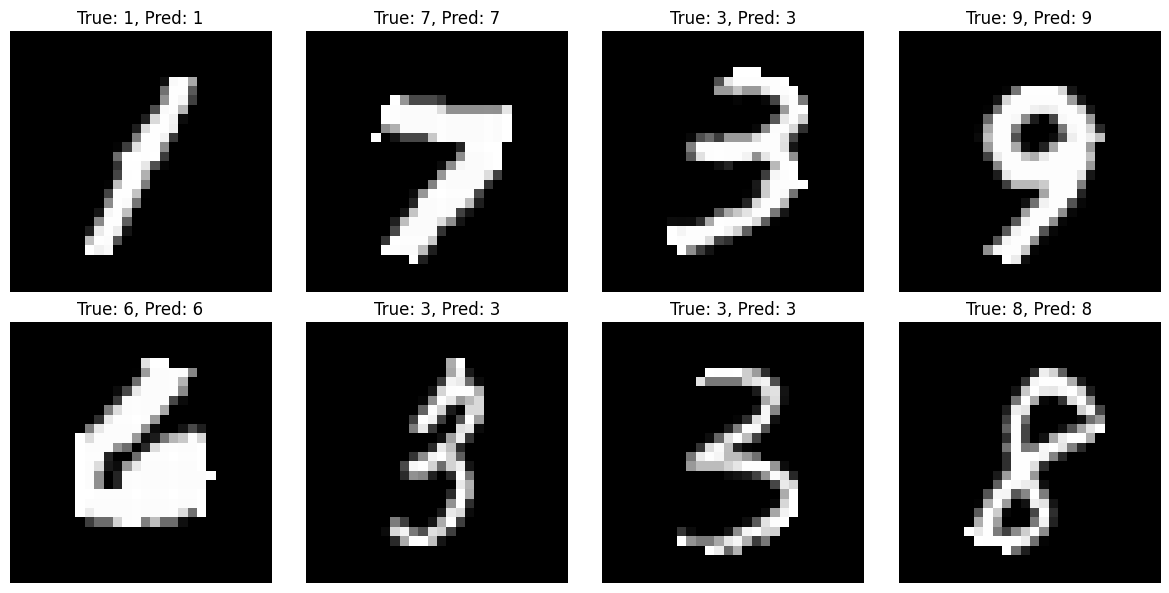

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# ensure numpy arrays instead of pandas DataFrames
x_test_np = np.array(x_test)
y_test_np = np.array(y_test)

num_images = 8  # number of images to display

# Pick random indices from test set
random_indices = np.random.choice(len(x_test_np), num_images, replace=False)

plt.figure(figsize=(12,6))

for i, idx in enumerate(random_indices):
    image = x_test_np[idx].reshape(28,28)      # reshape the flat vector to 28x28
    true_label = y_test_np[idx]
    
    # Predict using your trained MLP model
    pred_label = mlp.predict(x_test_np[idx].reshape(1, -1))[0]
    
    # Display the image with predicted and true label
    plt.subplot(2, num_images//2, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [1]:
import warnings
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# ==============================
# Ignore warnings
# ==============================
warnings.filterwarnings("ignore")

# ==============================
# Load dataset (CSV)
# ==============================
df = pd.read_csv("mnist_train.csv")

# Rename columns: first column is target, others are pixels
df.columns = ["target"] + [f"pixel_{i}" for i in range(df.shape[1] - 1)]

# Split features and labels
x = df.drop("target", axis=1).values
y = df["target"].values

# ==============================
# Preprocess data
# ==============================
# Reshape into (28,28,1)
x = x.reshape(-1, 28, 28, 1).astype("float32")
x = x / 255.0  # normalize

num_classes = len(np.unique(y))
y = tf.keras.utils.to_categorical(y, num_classes)  # one-hot labels

# Train/validation split
x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# ==============================
# Data Augmentation
# ==============================
datagen = ImageDataGenerator(
    rotation_range=15,       # Rotate images randomly
    width_shift_range=0.2,   # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    zoom_range=0.2           # Zoom in/out
)
datagen.fit(x_train)

# ==============================
# Build CNN Model
# ==============================
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation="relu"),
    Flatten(),

    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# ==============================
# Train with Augmentation
# ==============================
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    validation_data=(x_val, y_val),
    epochs=15
)

# ==============================
# Evaluate
# ==============================
y_pred_probs = model.predict(x_val)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_val, axis=1)

print("=== Final Test Evaluation ===")
print("Classification Report:\n", classification_report(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# ==============================
# Save Model (without optimizer for deployment)
# ==============================
model.save("mnist_cnn_model.keras", include_optimizer=False)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 81ms/step - accuracy: 0.6944 - loss: 0.9215 - val_accuracy: 0.9477 - val_loss: 0.1688
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 78ms/step - accuracy: 0.8938 - loss: 0.3539 - val_accuracy: 0.9732 - val_loss: 0.0832
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.9203 - loss: 0.2633 - val_accuracy: 0.9767 - val_loss: 0.0764
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - accuracy: 0.9386 - loss: 0.2036 - val_accuracy: 0.9781 - val_loss: 0.0702
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 80ms/step - accuracy: 0.9454 - loss: 0.1834 - val_accuracy: 0.9847 - val_loss: 0.0486
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 80ms/step - accuracy: 0.9530 - loss: 0.1578 - val_accuracy: 0.9858 - val_loss: 0.0455
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - accuracy: 0.9578 - loss: 0.1437 - val_accuracy: 0.9881 - val_loss: 0.0382
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.9598 - loss: 0.1345 - 

In [3]:
model.save("mnist_cnn_model.keras", include_optimizer=False)